<a href="https://colab.research.google.com/github/richards-okiemute/911-Calls-Data-Analysis-Project-using-Python/blob/main/911_Calls_Data_Analysis_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 911 Calls Data Analysis Project

#### Richards Okiemute (*richards.okiemute@gmail.com*)

This project involves analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


### Business Questions

* **What are the top 5 zipcodes for 911 calls?**
 
* **What are the top 5 townships (twp) for 911 calls?**
 
* **How many unique title codes are there?**
 
* **What is the most common Reason for a 911 call?**
 
* **What day of the week has most calls for different reasons for 911 calls?**
 
* **What month of the year has most calls for different reasons for 911 calls**
 
* **Plot useful visualization to enable us easily understand the trend for various reasons for 911 calls**


### Data Analysis

#### Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patch
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
sns.set_style('darkgrid')

#### Importing the 911 dataset

In [ ]:
#mounting google drive on jupyter notebook (google colaborratory)

from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/My Datasets/911.csv')

#Viewing the first 5 rows of the dataset
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
# checking the shape of the dataset

dataset.shape

(99492, 9)

The 911 calls dataset contains 99492 rows and 9 columns

In [ ]:
#checking the information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


There are four numberical features and five objects.

the `zip, twp, and addr` columns have missing values.

we will check for the missing values

In [ ]:
dataset.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

The zip code is missing 12855 values.

The twp contains 43 missing values and,

addr contains 519 missing values

### Answering Business Questions

#### What are the top 5 zipcodes for 911 calls?

In [ ]:
dataset['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The zip codes above are the top five zip codes.

**What are the top 5 townships (twp) for 911 calls?**

In [ ]:
dataset['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

The towns above made the most 911 calls.

**How many unique title codes are there?**

In [ ]:
dataset['title'].nunique()

110

There are 110 unique titles amongst the 911 callers.

**What is the most common Reason for a 911 call?**
 

The dataset doesn't explicitly contain any column for reason but we can extract the reason for different 911 calls from the title column because it contains `reason/department` information.

We will create a new column called reasons and extract the various reasons to this new column

In [ ]:
#extracting only the reasons from the title column
dataset['reason'] = dataset['title'].apply(lambda title:title.split(':')[0])

In [ ]:
#checking for the various reasons for 911 calls
dataset['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

There are basically three reasons for making 911 calls which are Emergencies, Fire, and Traffic.

In [ ]:
#checking which reason has the most 911 calls
dataset['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

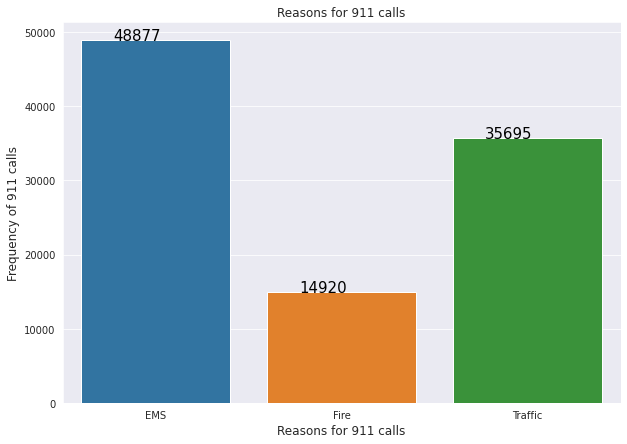

In [ ]:
#visualizing the reasons for 911 calls
ax = sns.countplot(data=dataset, x= 'reason')
plt.title('Reasons for 911 calls', size = 12)
plt.ylabel('Frequency of 911 calls', size = 12)
plt.xlabel('Reasons for 911 calls', size = 12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='baseline', color='black', size=15)
plt.show()


Emergencies are the most reasons for a 911 call, followed by Traffic, and lastly, Fire outbreaks.

**What day of the week has most calls for different reasons for 911 calls?**

The dataset does not contain any information about day of the week but we can extract date attributes from the timestamp features.

We will extract the day of the week and months from the timestamps. These will be used in providing answers to the business questions asked.

In [ ]:
type(dataset['timeStamp'].iloc[0])

str

The `timeStamp` column contains strings. We cannot extract anything meaningful from the string thus we will convert to datetime and then extract the dates, month, and day of the week from the datetime

In [ ]:
dataset['timeStamp'] = pd.to_datetime(dataset['timeStamp'])

In [ ]:
#checking to confirm the column now contains datetimes
type(dataset['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

The column now contains datetime values

In [ ]:
#extracting day of the week, dates,and month from the column
dataset['days'] = dataset['timeStamp'].apply(lambda day: day.dayofweek)
dataset['months'] = dataset['timeStamp'].apply(lambda month: month.month)
dataset['date']= dataset['timeStamp'].apply(lambda date: date.date())

In [ ]:
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,days,months,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,3,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,3,12,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,3,12,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,3,12,2015-12-10


The extracted days and months column are in integer form.

In [ ]:
print(dataset['days'].unique())

[3 4 5 6 0 1 2]


In [ ]:
#mapping the days integer to actual name of days of the week
map_days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: "Sunday"}
dataset['day of the week'] = dataset['days'].map(map_days)

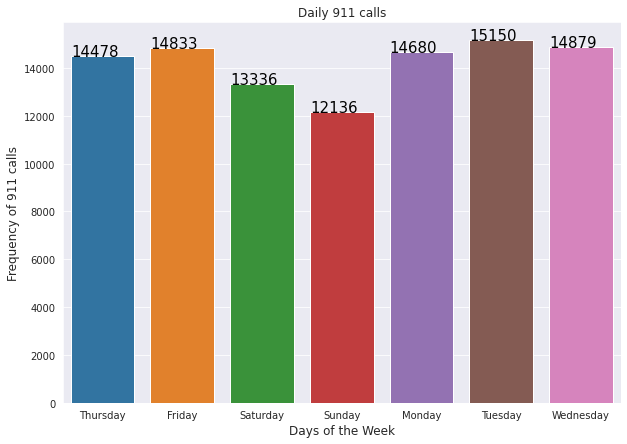

In [ ]:
ax = sns.countplot(data = dataset, x = 'day of the week')
plt.title('Daily 911 calls', size = 12)
plt.ylabel('Frequency of 911 calls', size = 12)
plt.xlabel('Days of the Week', size = 12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='baseline', color='black', size=15)
plt.show()

There are more 911 calls during the weekdays (Tuesdays have the most calls) than weekends (Sundays has the least amount of 911 calls)

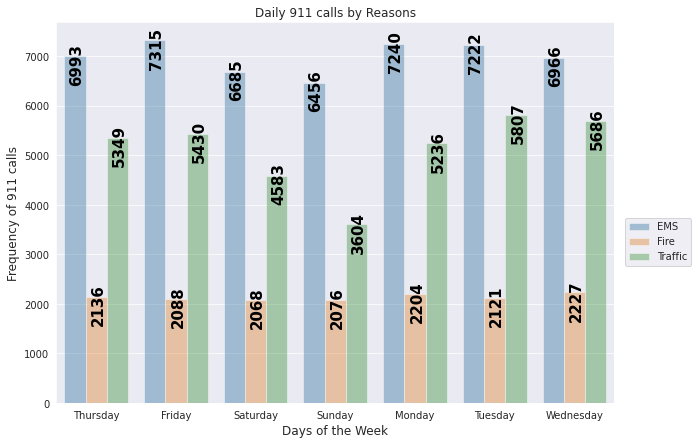

In [ ]:
ax = sns.countplot(data = dataset, x = 'day of the week', hue = 'reason', alpha = 0.4)
plt.title('Daily 911 calls by Reasons', size = 12)
plt.ylabel('Frequency of 911 calls', size = 12)
plt.xlabel('Days of the Week', size = 12)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc=2)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.05, p.get_height()), ha='center', va='center_baseline', color='black', size=15, rotation = 90, fontweight = 'bold')
plt.show()

The lowest categories of daily 911 calls received is `Fire`
The highest 911 calls received is `EMS`

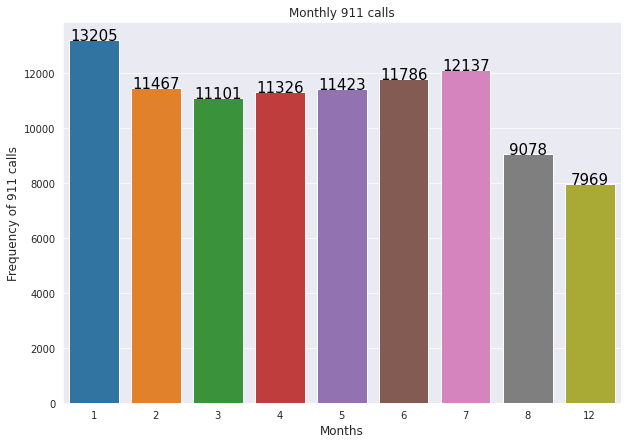

In [ ]:
ax = sns.countplot(data = dataset, x = 'months')
plt.title('Monthly 911 calls', size = 12)
plt.ylabel('Frequency of 911 calls', size = 12)
plt.xlabel('Months', size = 12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='baseline', color='black', size=15)
plt.show()

January is the month with the most 911 calls while November and December are months with the least number of 911 calls.

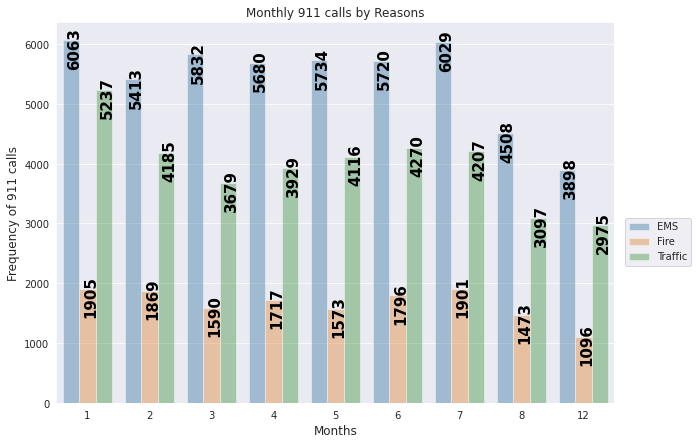

In [ ]:
ax = sns.countplot(data = dataset, x = 'months', hue = 'reason', alpha = 0.4)
plt.title('Monthly 911 calls by Reasons', size = 12)
plt.ylabel('Frequency of 911 calls', size = 12)
plt.xlabel('Months', size = 12)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc=2)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.05, p.get_height()), ha='center', va='center_baseline', color='black', size=15, rotation = 90, fontweight = 'bold')
plt.show()

#### Monthly 911 Calls by Reasons

* January and July witnessed the highest 911 calls for all three 911 call reasons (EMS, Fire, Traffic)
* November and December also witnessed the lowest 911 calls for all three 911 call reasons (EMS, Fire, Traffic)

Text(0.5, 0, 'Months')

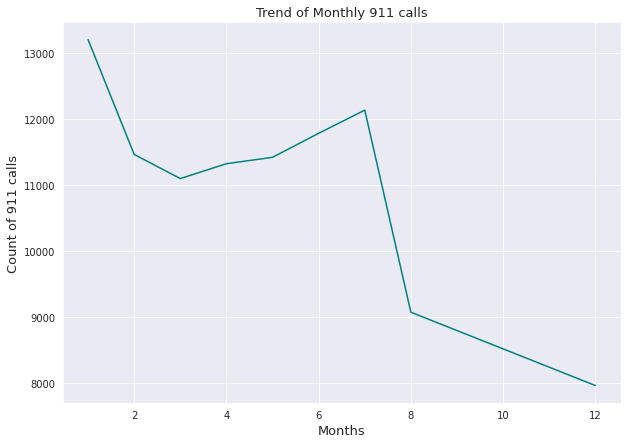

In [ ]:
month_grouped = dataset.groupby('months').count()
month_grouped['timeStamp'].plot(color = 'teal')
plt.title('Trend of Monthly 911 calls', size = 13)
plt.ylabel('Count of 911 calls', size = 13)
plt.xlabel('Months', size = 13)

The monthly call trend above shows that 911 calls were at the all time high in the month of January and fell till March before rising to July and then assumed a very strong decline trend.

In [ ]:
dataset.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'reason', 'days', 'months', 'date', 'day of the week'],
      dtype='object')

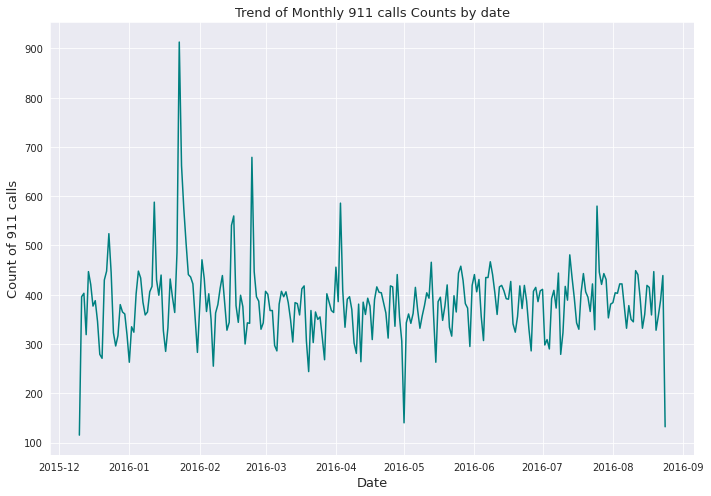

In [ ]:
dataset.groupby('date').count()['timeStamp'].plot(c = 'teal')
plt.title('Trend of Monthly 911 calls Counts by date', size = 13)
plt.ylabel('Count of 911 calls', size = 13)
plt.xlabel('Date', size = 13)
plt.tight_layout()

The spikes above indicates the upsurge in 911 calls during early 2016 and also a decline in 911 calls in May,2016 and September, 2016

Text(0, 0.5, 'Frequency of 911 Calls')

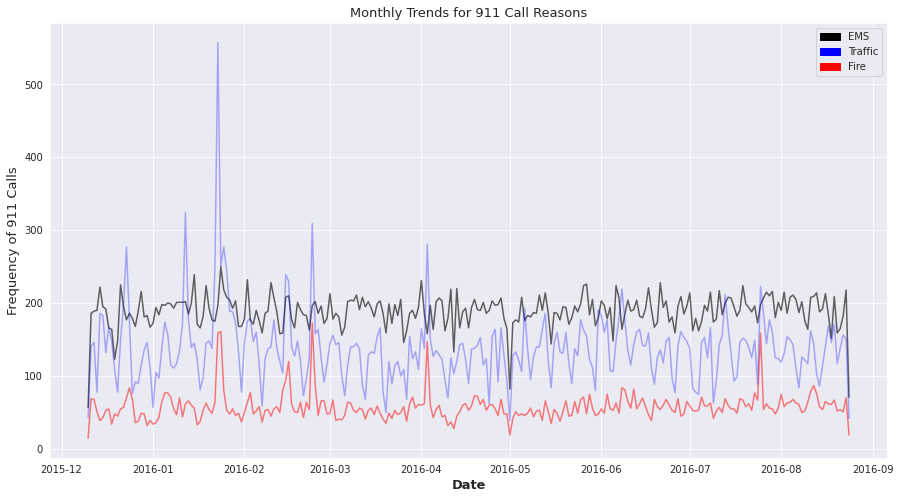

In [ ]:
plt.figure(figsize = (15,8))
dataset[dataset['reason']=='EMS'].groupby('date').count()['timeStamp'].plot(c = 'black', alpha =0.6)
dataset[dataset['reason']=='Fire'].groupby('date').count()['timeStamp'].plot(c = 'r', alpha=0.5)
dataset[dataset['reason']=='Traffic'].groupby('date').count()['timeStamp'].plot(c = 'b', alpha=0.3)
black = patch.Patch(color ='black', label='EMS')
blue = patch.Patch(color ='b', label='Traffic')
red = patch.Patch(color ='r', label='Fire')
plt.legend(handles=[black,blue,red])
plt.title('Monthly Trends for 911 Call Reasons', size = 13)
plt.xlabel('Date', size = 13, fontweight ='bold')
plt.ylabel('Frequency of 911 Calls', size = 13)

**The above visualization shows the trends for the various reasons for 911 calls.**

* Early 2016 witness series of sharp spikes in traffic 911 calls. These spikes could indicate days with extremely busy traffics.

* EMS 911 calls where relatively steady trend across the entire year expect for December, 2015, May,2016, and September, 2016 where there were significant decline in calls below 100 calls per month.

* There were more fire 911 calls spike in the early part of 2016 and also a further spike in fire 911 calls in July,2016. These are likely months with rapid fire outbreaks.





In [ ]:
#creating an unstacked dataframe for hour of the day and day of the week
dataset['hour'] = dataset['timeStamp'].apply(lambda hour:hour.hour)
houroftheday = dataset.groupby(['day of the week','hour']).count()['reason'].unstack()
houroftheday

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
day of the week,,,,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,840,838,887,917,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,800,789,903,872,904,867,990,1037,894,686,668,575,490,335


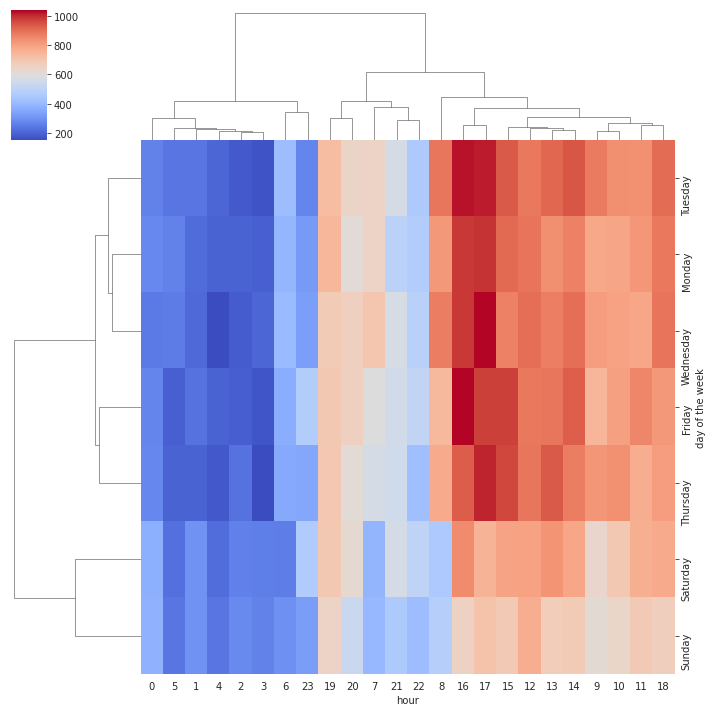

In [ ]:
#plotting a cluster map to group hours with similar 911 call counts
sns.clustermap(houroftheday,cmap='coolwarm')

* Most 911 calls occur during the eveningsof weekdays.
* There are very few 911 calls in the morning throughout the whole week.

In [ ]:
dayofthemonth = dataset.groupby(['day of the week','months']).count()['reason'].unstack()
dayofthemonth.head()

months,1,2,3,4,5,6,7,8,12
day of the week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266


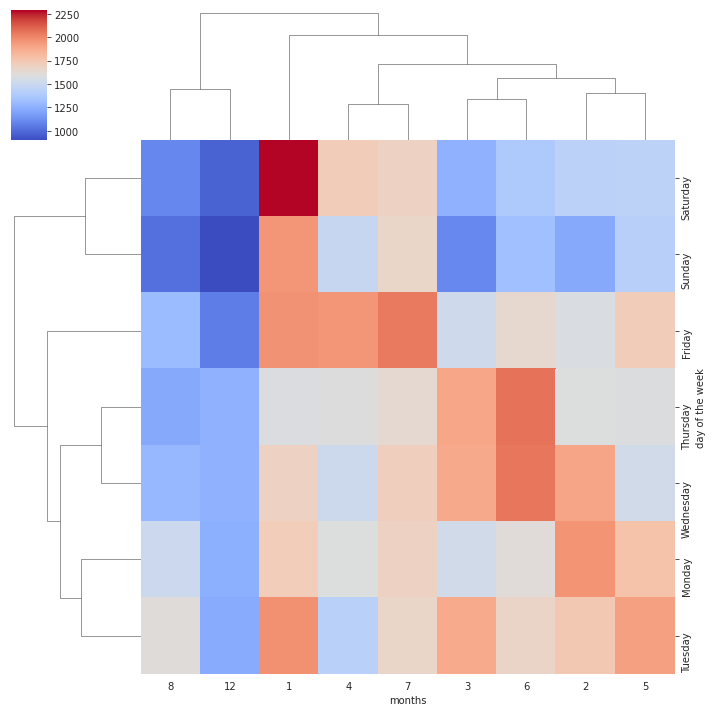

In [ ]:
#plotting a cluster map to group months with similar 911 call counts
sns.clustermap(dayofthemonth,cmap='coolwarm')

* Over 2250 911 calls were made in January on Saturday. This is the highest call recorded so far.
* December and August recorded the least calls.
* On Wednesday and Thursday of  March and June are months with relatively large number of 911 calls.
* Also, Friday of January, April, and July experience high 911 calls.